# SIS 1

# Some theoretical questions

## Exercise: Comparing MSE and RMSE

Given the following set of true values and predicted values from a regression model:

**True values :**  

$y_i$ = [500, 300, 800, 400, 6000]

**Predicted values :** 

$\hat{y_i}$ = [450, 350, 780, 420, 910]

1. Calculate on paper the **Mean Squared Error (MSE)** for this set of true and predicted values. 

   The formula for MSE is:  
   MSE = $\frac{1}{n} \Sigma_{i=1}^n({y_i}-\hat{y_i})^2$, where n is the number of data points.

2. What does the result quantify ? Explain with your own words.

3. What are the disadvantages of this metric ?

4. Calculate the **Root Mean Squared Error (RMSE)** for the same values.

   The formula for RMSE is:

   RMSE = $\sqrt{\frac{1}{n} \Sigma_{i=1}^n({y_i}-\hat{y_i})^2} = \sqrt{MSE}$

5. Interprete the results.

6. What is the difference with MSE ? How does it make it "better" ? In your opinion, why is the RMSE generally preferred in some situations over MSE ?

## Exercise: Bias Variance decomposition of MSE 

Given a model $\hat{f}(X)$ that predicts a value based on some input data, and the true value $Y$, prove that the **Mean Squared Error (MSE)** can be decomposed into two components: **Bias** and **Variance**, i.e. $\text{MSE} = \mathbb{E}[(\hat{Y} - Y)^2] = (\text{Bias}(\hat{Y}))^2 + \text{Var}(\hat{Y}) $

Where:
- **Bias** is the difference between the expected prediction and the true value, i.e., $\text{Bias} = \mathbb{E}[\hat{Y}] - Y$.
- **Variance** is the expected squared deviation of the predicted value from the expected predicted value, i.e., $\text{Variance} = \mathbb{E}[(\hat{Y} - \mathbb{E}[\hat{Y}])^2]$.


Hints:
- Use the identity : $(\hat{Y} - Y) = (\hat{Y} - \mathbb{E}[\hat{Y}]) + (\mathbb{E}[\hat{Y}] - Y) = (\hat{Y} - \mathbb{E}[\hat{Y}]) + \text{Bias}(\hat{Y})$
- Start by expanding the expression $(\hat{Y} - Y)^2$ to isolate the terms involving $\hat{Y}$ and $Y$.

# Coding exercise

In this exercise, we will train a model to predict price of cars (column 'selling_price'), using other features in the dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # you can also use seaborn if you prefer
import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor

# Import the other necessary library here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder #import OHE encoder from scikit learn
from sklearn.preprocessing import StandardScaler, MinMaxScaler #scalers for numerical data
from sklearn.metrics import mean_squared_error #mse function


In [3]:
# import the dataset
df = pd.read_csv("cars.csv")
df = df.fillna(value=float(0)) # replace NaN by float(0) (don't do this automatically in future projects, it can be source of under or overfitting. It should be done precociously)

### 1. Analyse your dataset. How many features and columns do we have ?

In [ ]:
# Use DataFrame.shape to access the dimensions of the dataframe as a tuple

# here we locate all of the columns except for the target variabel - selling_price and find the number of columns in the resulting df
print('Features: ', df.loc[:, df.columns != 'selling_price'].shape[1]) 

# here we simple output the total number of columns in the df
print('Columns: ', df.shape[1])

Features:  11
Columns:  12


### 2. What categorical variables are ordinal or nominal ? Encode them using OHE and Label encoder from SKLearn. 

In [59]:
# View the top few entries of the dataset
# Here we identify which variables are non-numeric
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [60]:
# view the names of the columns in the dataset
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

Categoricals variables: name, fuel, seller_type, transmission, owner

In [62]:
categorical_vars = ['name', 'fuel', 'seller_type', 'transmission', 'owner']
for cat_var in categorical_vars:
    #for each categorical variable in the dataset we print its possible values
    print(cat_var + " values:", end=" ")
    print(*df[cat_var].unique(), sep=", ")

name values: Maruti Swift Dzire VDI, Skoda Rapid 1.5 TDI Ambition, Honda City 2017-2020 EXi, Hyundai i20 Sportz Diesel, Maruti Swift VXI BSIII, Hyundai Xcent 1.2 VTVT E Plus, Maruti Wagon R LXI DUO BSIII, Maruti 800 DX BSII, Toyota Etios VXD, Ford Figo Diesel Celebration Edition, Renault Duster 110PS Diesel RxL, Maruti Zen LX, Maruti Swift Dzire VDi, Maruti Swift 1.3 VXi, Maruti Wagon R LXI Minor, Mahindra KUV 100 mFALCON G80 K8 5str, Maruti Ertiga SHVS VDI, Hyundai i20 1.4 CRDi Asta, Maruti Alto LX, Hyundai i20 2015-2017 Asta 1.4 CRDi, Mahindra Verito 1.5 D4 BSIII, Honda WR-V i-DTEC VX, Maruti Swift Dzire ZDI, Maruti SX4 ZDI, Tata Tigor 2017-2020 XZ, Maruti Baleno Delta 1.2, Maruti Alto 800 LXI, Chevrolet Enjoy TCDi LTZ 7 Seater, Maruti Omni E MPI STD BS IV, Maruti Vitara Brezza LDi Option, Fiat Palio 1.2 ELX, Maruti Omni 8 Seater BSIV, Hyundai i20 1.2 Asta Dual Tone, Maruti Vitara Brezza LDi, Maruti Alto 800 CNG LXI Optional, Maruti Alto K10 VXI Airbag, Hyundai Verna VTVT 1.6 SX Opti

Categorical variables name, fuel, seller_type, and transmission are nominal (do not have a particular order).    
Categorical variable owner is ordinal (we can order the values from first owner to fourth & above owner in ascending order).

In [63]:


ohe = OneHotEncoder()
ohe.set_params(sparse_output=False) # setting output of ohe encoder to a dense array for convenience
ohe.set_output(transform='pandas') # setting the output to a pandas dataframe
fuel_ohe = ohe.fit_transform(df[['fuel']]).astype(int) # applying OHE and also casting to int (by default a float value is returned)
fuel_ohe

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,0,1,0,0
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
8123,0,0,0,1
8124,0,1,0,0
8125,0,1,0,0
8126,0,1,0,0


In [64]:
seller_type_ohe = ohe.fit_transform(df[['seller_type']]).astype(int) #using the same encoder, encoding seller type using OHE
seller_type_ohe.sample(10) #random sample of 10 values to check if the encoding is corret

,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
2428,0,1,0
2737,0,1,0
6194,0,1,0
7231,0,1,0
5982,0,1,0
1692,0,1,0
1636,0,1,0
1464,0,1,0
2052,0,1,0
245,0,1,0


In [65]:
transmission_ohe = ohe.fit_transform(df[['transmission']]).astype(int) #the same thing but for transmission type
transmission_ohe

,transmission_Automatic,transmission_Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
8123,0,1
8124,0,1
8125,0,1
8126,0,1


In [66]:
# a dict of mappings from a ordinal value to its nuemrical representation
label_encoding = {
    'Test Drive Car' : 0,
    'First Owner' : 1, 
    'Second Owner' : 2, 
    'Third Owner' : 3, 
    'Fourth & Above Owner' : 4
}

In [67]:
df = df.drop(columns=['name', 'fuel', 'seller_type', 'transmission']) #deleting categorical variables

In [68]:
df = df.join([fuel_ohe, seller_type_ohe, transmission_ohe]) #adding the OHE endoded columns

In [69]:
df['owner'] = df['owner'].map(label_encoding) # applying our label encoding for the owner colunm

In [70]:
df

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,2014,450000,145500,1,23.40,1248.0,74.00,5.0,0,1,0,0,0,1,0,0,1
1,2014,370000,120000,2,21.14,1498.0,103.52,5.0,0,1,0,0,0,1,0,0,1
2,2006,158000,140000,3,17.70,1497.0,78.00,5.0,0,0,0,1,0,1,0,0,1
3,2010,225000,127000,1,23.00,1396.0,90.00,5.0,0,1,0,0,0,1,0,0,1
4,2007,130000,120000,1,16.10,1298.0,88.20,5.0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,1,18.50,1197.0,82.85,5.0,0,0,0,1,0,1,0,0,1
8124,2007,135000,119000,4,16.80,1493.0,110.00,5.0,0,1,0,0,0,1,0,0,1
8125,2009,382000,120000,1,19.30,1248.0,73.90,5.0,0,1,0,0,0,1,0,0,1
8126,2013,290000,25000,1,23.57,1396.0,70.00,5.0,0,1,0,0,0,1,0,0,1


### 3. Plot the distributions of Year, km_driven and mileage data. What could be a problem for convergence ?

#### Year

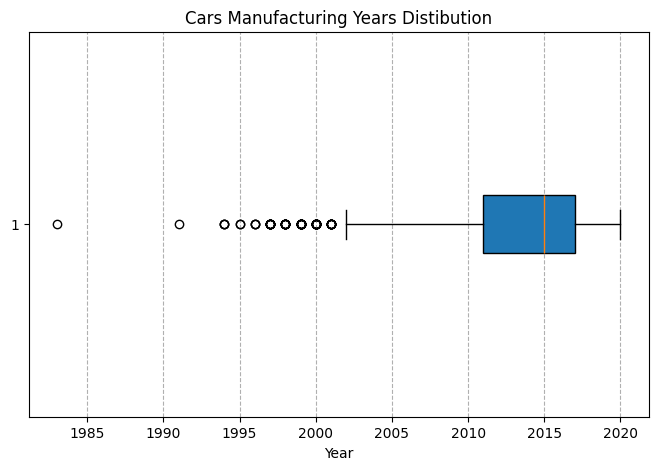

In [71]:
# Basic matplotlib setup - figure size, labels, title and show are pretty straighforward )

plt.figure(figsize=(8,5))
plt.boxplot(df['year'], orientation='horizontal', patch_artist=True) #using a horizontal boxplot 
plt.xlabel('Year')
plt.title('Cars Manufacturing Years Distibution')
plt.grid(axis="x", linestyle="--", alpha=1) #adding vertical grid lines
plt.show()

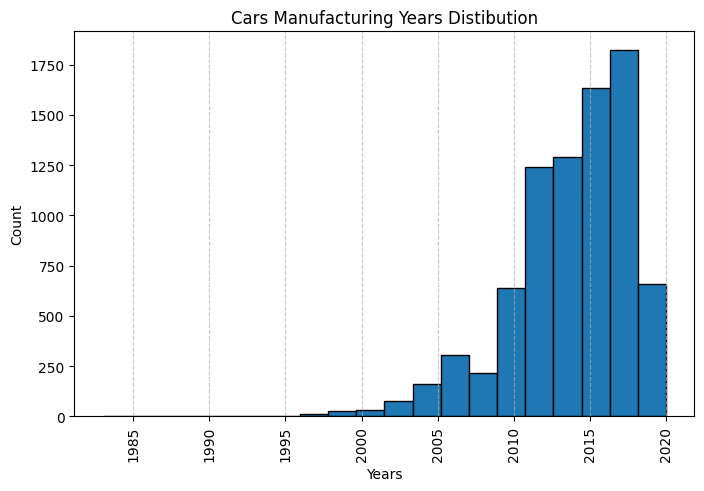

In [72]:
plt.figure(figsize=(8,5))
plt.hist(df['year'], bins=20, edgecolor='black') #creating a 20 bin rect histogram with black border color
plt.xlabel('Years')
plt.xticks(rotation='vertical') #displaying year vertically
plt.ylabel('Count')
plt.title('Cars Manufacturing Years Distibution')
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

#### Km driven

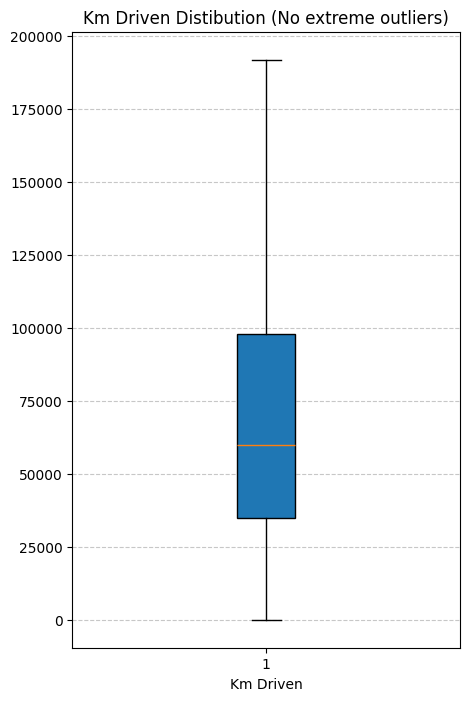

In [73]:
plt.figure(figsize=(5, 8))
plt.boxplot(df['km_driven'], orientation="vertical", patch_artist=True, showfliers=False) # using boxplot, filter out the outliers
plt.xlabel('Km Driven')
plt.title('Km Driven Distibution (No extreme outliers)')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

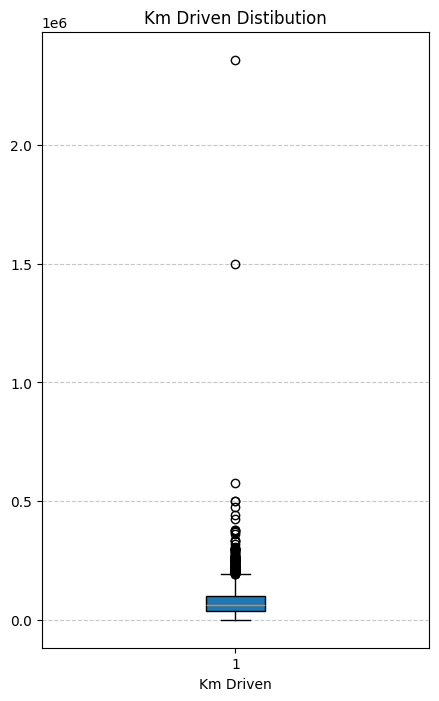

In [74]:
plt.figure(figsize=(5, 8))
plt.boxplot(df['km_driven'], orientation="vertical", patch_artist=True, showfliers=True) # using boxplot with extreme outliers
plt.xlabel('Km Driven')
plt.title('Km Driven Distibution')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

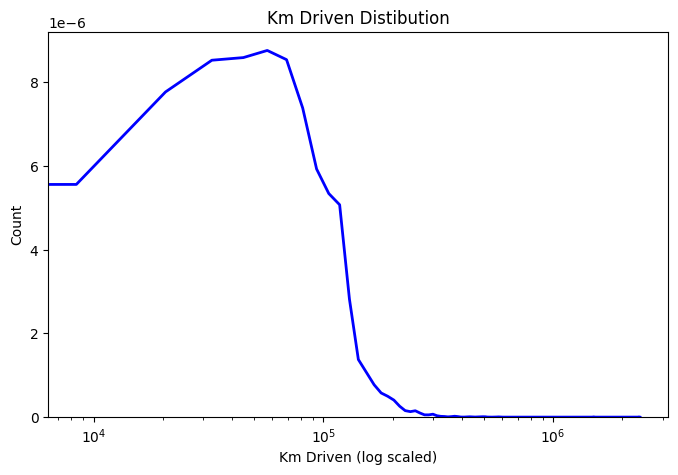

In [75]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df["km_driven"], bw_adjust=1, color="blue", lw=2)
plt.xscale("log") #scaling down the price value to draw it on the plot
plt.xlabel('Km Driven (log scaled)')
plt.ylabel('Count')
plt.title('Km Driven Distibution')
plt.show()

#### Mileage

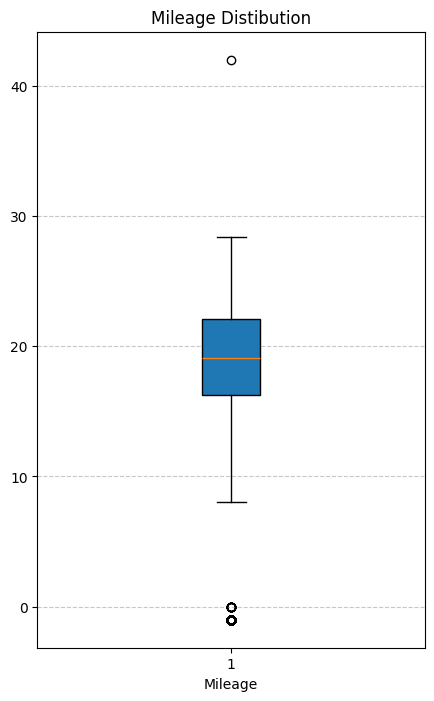

In [76]:
plt.figure(figsize=(5, 8))
plt.boxplot(df['mileage'], orientation="vertical", patch_artist=True, showfliers=True) # using boxplot with extreme outliers
plt.xlabel('Mileage')
plt.title('Mileage Distibution')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

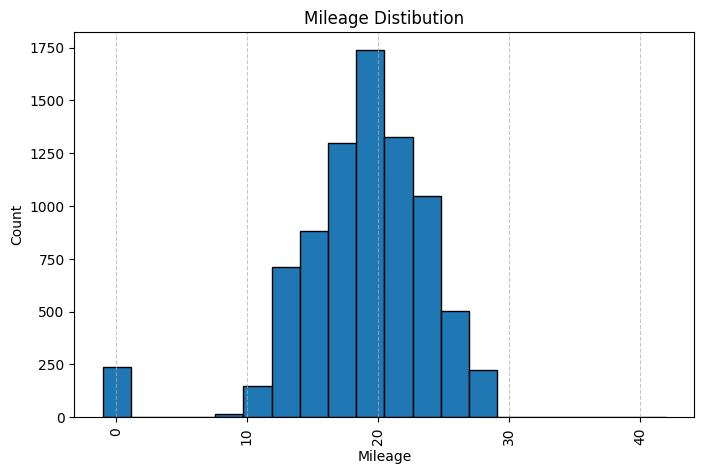

In [78]:
plt.figure(figsize=(8,5))
plt.hist(df['mileage'], bins=20, edgecolor='black') #creating a 20 bin rect histogram with black border color
plt.xlabel('Mileage')
plt.xticks(rotation='vertical') #displaying mileage vertically
plt.ylabel('Count')
plt.title('Mileage Distibution')
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

Convergence problems:
- range of values between year, km_driven differs significantly, which can result in slow or inefficient model work
- extreme outliers, like in km_driven, might lead to problems with gradient descent based models
- if mileage or km_driven are correlated with year of manufacturing, this may lead to linear depenpendance (unwanted in linear regression models)
- skewed distibution may cause bias => solved using normalization / scaling in general

### 4. Scale those three numerical features, use whatever scaler you want (but use the SKLearn scalers)

In [79]:
# I will use StdScaler for mileage and km, MinMaxScaler for years
# both are available as classes in scikit-learn


std_scaler_km = StandardScaler() #creating a scaler 
std_scaler_km.set_output(transform='pandas') #setting output as pd dataframe
km_driven_scaled = std_scaler_km.fit_transform(df[['km_driven']]) # fitting the scaler on the km data, transforming it and returning a new df
km_driven_scaled

,km_driven
0,1.338363
1,0.887411
2,1.241098
3,1.011202
4,0.887411
...,...
8123,0.710567
8124,0.869726
8125,0.887411
8126,-0.792605


In [80]:
min_max_scaler_year = MinMaxScaler() #creating a scaler 
min_max_scaler_year.set_output(transform='pandas') #setting output as pd dataframe
year_scaled = min_max_scaler_year.fit_transform(df[['year']]) # fitting the scaler on the year data, transforming it and returning a new df
year_scaled

,year
0,0.837838
1,0.837838
2,0.621622
3,0.729730
4,0.648649
...,...
8123,0.810811
8124,0.648649
8125,0.702703
8126,0.810811


In [81]:
# same thing as for km, but for mileage
std_scaler_mileage = StandardScaler() 
std_scaler_mileage.set_output(transform='pandas')
mileage_scaled = std_scaler_mileage.fit_transform(df[['mileage']])
mileage_scaled

,mileage
0,0.890224
1,0.452663
2,-0.213361
3,0.812780
4,-0.523139
...,...
8123,-0.058472
8124,-0.387611
8125,0.096418
8126,0.923138


In [82]:
#replacing all unscaled columns with their scaled versions
df['year'] = year_scaled
df['mileage'] = mileage_scaled
df['km_driven'] = km_driven_scaled
df 

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,0.837838,450000,1.338363,1,0.890224,1248.0,74.00,5.0,0,1,0,0,0,1,0,0,1
1,0.837838,370000,0.887411,2,0.452663,1498.0,103.52,5.0,0,1,0,0,0,1,0,0,1
2,0.621622,158000,1.241098,3,-0.213361,1497.0,78.00,5.0,0,0,0,1,0,1,0,0,1
3,0.729730,225000,1.011202,1,0.812780,1396.0,90.00,5.0,0,1,0,0,0,1,0,0,1
4,0.648649,130000,0.887411,1,-0.523139,1298.0,88.20,5.0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0.810811,320000,0.710567,1,-0.058472,1197.0,82.85,5.0,0,0,0,1,0,1,0,0,1
8124,0.648649,135000,0.869726,4,-0.387611,1493.0,110.00,5.0,0,1,0,0,0,1,0,0,1
8125,0.702703,382000,0.887411,1,0.096418,1248.0,73.90,5.0,0,1,0,0,0,1,0,0,1
8126,0.810811,290000,-0.792605,1,0.923138,1396.0,70.00,5.0,0,1,0,0,0,1,0,0,1


In [83]:
df['km_driven'].describe()

count    8.128000e+03
mean    -5.900792e-17
std      1.000062e+00
min     -1.234697e+00
25%     -6.157615e-01
50%     -1.736520e-01
75%      4.983545e-01
max      4.050850e+01
Name: km_driven, dtype: float64

### 5. Select Features and Target Variable
Separate X's to y in two different datasets

In [84]:
X = df.loc[:, df.columns != 'selling_price'] #locating all of the columns except for the price
X


,year,km_driven,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,0.837838,1.338363,1,0.890224,1248.0,74.00,5.0,0,1,0,0,0,1,0,0,1
1,0.837838,0.887411,2,0.452663,1498.0,103.52,5.0,0,1,0,0,0,1,0,0,1
2,0.621622,1.241098,3,-0.213361,1497.0,78.00,5.0,0,0,0,1,0,1,0,0,1
3,0.729730,1.011202,1,0.812780,1396.0,90.00,5.0,0,1,0,0,0,1,0,0,1
4,0.648649,0.887411,1,-0.523139,1298.0,88.20,5.0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0.810811,0.710567,1,-0.058472,1197.0,82.85,5.0,0,0,0,1,0,1,0,0,1
8124,0.648649,0.869726,4,-0.387611,1493.0,110.00,5.0,0,1,0,0,0,1,0,0,1
8125,0.702703,0.887411,1,0.096418,1248.0,73.90,5.0,0,1,0,0,0,1,0,0,1
8126,0.810811,-0.792605,1,0.923138,1396.0,70.00,5.0,0,1,0,0,0,1,0,0,1


In [85]:
y = df['selling_price'] #separing price into a new df. now we treat y as our target variable
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64

### 6. Plot the distribution of the Target variable 

 You can us matplotlib or seaborn libraries


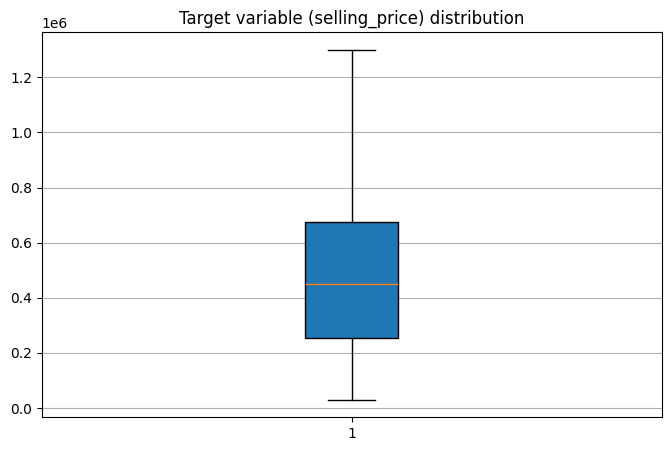

In [92]:
plt.figure(figsize=(8,5))
plt.boxplot(y, patch_artist=True, showfliers=False) #boxplot without outliers
plt.grid(True, axis='y')
plt.title('Target variable (selling_price) distribution')
plt.show()

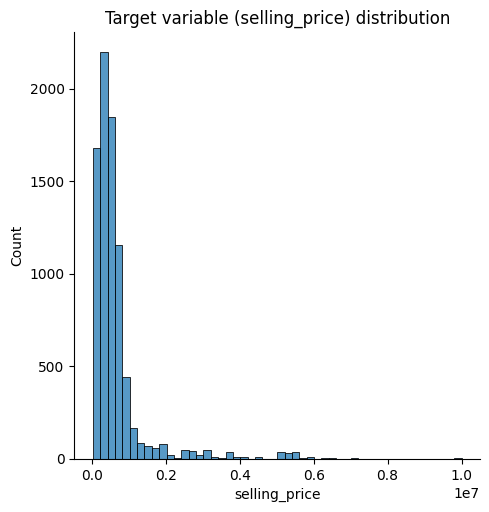

In [93]:
sns.displot(df[['selling_price']], x='selling_price', bins=50) # using seaborn's displot to plot the selling price distibution as a histogram
plt.title('Target variable (selling_price) distribution')
plt.show()

### 7. Split the Data
Use to SKLearn built-in function ```train_test_split()``` to split the dataset into training and testing sets. 

You should then have four dataset, X_train, X_test, y_train and y_test.

In [94]:
# splitting the data 80:20 between train and test
# here i am going to use random_state=42 to produce repeatable results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)   

### 8. Train a Gradient Boosting Model

The following code trains an ensemble Model. The class ```GradientBoostingRegressor(*params)```  setup the model and the function ```fit(X_train, y_train)``` trains and fits it.
- Use the function ```Predict()``` to predict y, both with your train and test datasets. (have a look at SKlearn documentation to use it)
- Compute the train and test Mean Squared Errors.


In [95]:
n = 10 # number of estimators (relative to model complexity)

gbr = GradientBoostingRegressor(n_estimators=n, random_state=42, learning_rate=0.9) # dont change those parameters
gbr.fit(X_train, y_train) 

# YOUR CODE GOES HERE
print('Train: ')
y_train_pred = gbr.predict(X_train) # predicting the train data
print(y_train_pred)
print('Train data score: ', gbr.score(X_train, y_train)) #calculating the coefficient of determination for train data predictions

train_mse = mean_squared_error(y_train, y_train_pred) #calculating the MSE for train data predictions
print('Train data MSE: ', train_mse)

print()

print('Test: ')
y_test_pred = gbr.predict(X_test) # predicting the test data (model hasn's seen it yet)
print(y_test_pred)
print('Test data score: ', gbr.score(X_test, y_test)) #calculating the coefficient of determination for test data predictions 

test_mse = mean_squared_error(y_test, y_test_pred) #calculating the MSE for test data predictions
print('Test data Mse: ', test_mse)

Train: 
[622979.97031512 206629.64945428 300936.40240776 ... 468352.47063074
 677568.51634931 107765.66069841]
Train data score:  0.9578663769949916
Train data MSE:  27327170262.089985

Test: 
[197873.20084766 803908.26821498 503467.18413844 ... 533400.66237383
 778099.85451171 206629.64945428]
Test data score:  0.9381991036706386
Test data Mse:  40509525946.95849


Here, I also calculated the $r^2$ or **coefficient of determinatio**n for both train and test data.  
As a result, I got $r^2 = 0.9578663769949916$ for train and $r^2 = 0.9381991036706386$ for test data.  
We can interpret $r^2$ as a measure of how much the variance in the target variable is described by our regression model. And the values close to 1 are usually considered good.

### 9 : Increase the model complexity

Train your model in a loop that increase the parameter ```n```. Start at n = 10 to n = 5000 and step = 500 (otherwise your code will run for hours).

At each iterations : 
- reset the model
- train the model
- predict values using X_train
- compute the MSE of training and testing sets.
- store the new mse in a list

In [96]:
train_mse_list = []
test_mse_list = []

for n in range(10, 5000, 500):
    gbr = GradientBoostingRegressor(n_estimators=n, random_state=42, learning_rate=0.9) #changing the number of estimators on each iteration
    gbr.fit(X_train, y_train) #fit the model anew

    y_train_pred = gbr.predict(X_train) #predict train data
    train_mse = mean_squared_error(y_train, y_train_pred) #calculate MSE

    train_mse_list.append(train_mse) #store MSE in a list 

    y_test_pred = gbr.predict(X_test) #predict test data
    test_mse = mean_squared_error(y_test, y_test_pred) #calculate MSE

    test_mse_list.append(test_mse) #store MSE in a list 




In [97]:
print(train_mse_list)
print(test_mse_list)

[27327170262.089985, 2679906432.787392, 1787420331.2609847, 1393854786.3420815, 1158492721.9586627, 1005443888.5037576, 894445862.7705847, 809274831.0764567, 744195436.6247822, 685990990.6025592]
[40509525946.95849, 29021370186.251392, 30054821935.14137, 30456018477.009888, 30799452549.59154, 31111878309.06679, 31382586578.57349, 31620995183.811947, 31625065910.69628, 31695426577.792454]


### 10 : In one figure, plot both train and test MSE evolution, with respect to the model complexity (i.e. n) 

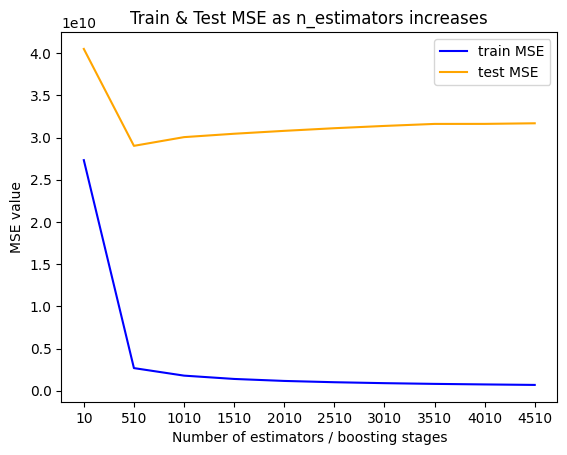

In [98]:
n_estimators_list = list(range(10, 5000, 500)) #replicating the n_estimators for plotting purposes

plt.plot(n_estimators_list, train_mse_list, color='blue', label='train MSE')
plt.plot(n_estimators_list, test_mse_list, color='orange', label='test MSE')
plt.xticks(n_estimators_list) # show the values from the n_estimators list on the X-axis
plt.xlabel('Number of estimators / boosting stages')
plt.ylabel('MSE value')
plt.title('Train & Test MSE as n_estimators increases')
plt.legend()
plt.show()

### 11 : What can you observe ?

I can observe that at the point of 510 estimators / boosting stages, both the train and test MSE stop decresing rapidly.  
Instead, the train MSE start to decrease gradually, while the test MSE slowly increases as we add new estimators to our GradientBoostingRegressor   

This is a sign of **overfitting**. In other words, our model does not learn anything new from observing the same train data. Instead, it remembers the train data (including all of the outliers) and struggles to give good prediction for test data that it has not seen yet, resulting in increasing error.

### 12 (Bonus) : In your opinion, what could we change in the code to improve our model fit ? 

In [99]:
df

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,0.837838,450000,1.338363,1,0.890224,1248.0,74.00,5.0,0,1,0,0,0,1,0,0,1
1,0.837838,370000,0.887411,2,0.452663,1498.0,103.52,5.0,0,1,0,0,0,1,0,0,1
2,0.621622,158000,1.241098,3,-0.213361,1497.0,78.00,5.0,0,0,0,1,0,1,0,0,1
3,0.729730,225000,1.011202,1,0.812780,1396.0,90.00,5.0,0,1,0,0,0,1,0,0,1
4,0.648649,130000,0.887411,1,-0.523139,1298.0,88.20,5.0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0.810811,320000,0.710567,1,-0.058472,1197.0,82.85,5.0,0,0,0,1,0,1,0,0,1
8124,0.648649,135000,0.869726,4,-0.387611,1493.0,110.00,5.0,0,1,0,0,0,1,0,0,1
8125,0.702703,382000,0.887411,1,0.096418,1248.0,73.90,5.0,0,1,0,0,0,1,0,0,1
8126,0.810811,290000,-0.792605,1,0.923138,1396.0,70.00,5.0,0,1,0,0,0,1,0,0,1


I think we can do some of the following changes:
- analyze, plot how some of the features relate to the target variable. If there is no clear relationship, we can try to drop this feature
- some of our numerical features like engine, max_power have magnitudes larger than other numerical features. We can try to scale them as well
- limit max_depth of the regressor to avoid it from becoming too complex
- we can try to decrease the learning rate 